### Part B

In [91]:
import tweepy
apiKey = 'GrA3nnbfd72pCqfBGUR6RKnul'
apiSecretKey = 'mjZdyFx5sN38u2joIKNKzjgIuGOCpLOoXoKo1GoV9Vc44YH9HE'
auth = tweepy.OAuthHandler(apiKey,apiSecretKey)
accessToken = '1214429579030319105-GQTJuPKzWQfow9mwxvXCFxpO0cjsgi'
accessSecretToken = 'fksdPA39BXWBgpi4CpVKT1k537kFjzfCIt8vT8H3ReFci'

auth.set_access_token(accessToken,accessSecretToken)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=10, retry_delay=5, retry_errors=set([503]))
if (api):
    print("Yaay")
else:
    print("Nahh")

Yaay


In [3]:
followers=[]
print("start")
for user in tweepy.Cursor(api.followers_ids, id="UnderArmour").items():
    print('follower: ', user)
    followers.append(user)
    if len(followers)==1000:
        break
followers
len(followers)


start
follower:  1227328726582456320
follower:  894140508754333697
follower:  1209124149815365632
follower:  1226216973341724674
follower:  1223569808920236033
follower:  812978378185707522
follower:  1204046994479689728
follower:  362822856
follower:  796579929571921920
follower:  1224451184704008192
follower:  2475804019
follower:  2581609052
follower:  1227305699971125248
follower:  1188475246808043523
follower:  1216069324080844800
follower:  612709033
follower:  1100416290357792768
follower:  970307992406110213
follower:  2544568099
follower:  536937295
follower:  1125784429
follower:  1037831102180802561
follower:  106109163
follower:  1563319724
follower:  3400617670
follower:  1221821230099189761
follower:  4325843533
follower:  1227281756996304909
follower:  891736926255947776
follower:  1218452406524108800
follower:  1227275313047953408
follower:  61032992
follower:  1205276374493204480
follower:  1316077242
follower:  1227252501495181312
follower:  1224552966520233984
follow

follower:  1222880549900967937
follower:  1170258131588452352
follower:  1201846096303140866
follower:  893791315552612352
follower:  64603164
follower:  1223781792320278528
follower:  1225422426638471168
follower:  1156836824171651072
follower:  1080987671432974336
follower:  1164955700063285249
follower:  1405111728
follower:  93953644
follower:  1198163331309113344
follower:  2994135230
follower:  1067169600943648768
follower:  1011511571846127617
follower:  1221052967702482946
follower:  352650405
follower:  2200587123
follower:  2660973626
follower:  1218532477859483648
follower:  281612555
follower:  805612501
follower:  420804294
follower:  990562248627113984
follower:  572031012
follower:  1224164423503437826
follower:  1110234857228128256
follower:  926426462051356673
follower:  1222823193112731648
follower:  1225212588126089217
follower:  1225377329066762241
follower:  1110338459426844673
follower:  1075098488
follower:  45661078
follower:  2504304735
follower:  1224731774074

1000

In [31]:
print(len(followers))

1000


In [ ]:
userLocation={}
for userid in followers:
    geoTag = False
    location = []
    u = api.get_user(userid)
    if(not u.protected):
        for tweet in tweepy.Cursor(api.user_timeline,id = userid).items(20):
            if(tweet.geo):
                location.append(tweet.geo["coordinates"])
                print(tweet.geo["coordinates"])
    else:
        print("Protected")
    if(len(location)>0):
        userLocation[userid]=location
        print(userid)
    print("----------------")  
    

In [39]:
userLocation

{1563319724: [[-33.9045, 18.42]],
 3428806071: [[48.85098, 2.47471], [35.781944, 51.375]],
 36957942: [[1.29535636, 103.78069371],
  [25.8871, -80.16532],
  [26.28129302, -80.15075793]],
 821375486: [[39.40887404, -76.58376594],
  [39.40891813, -76.5838387],
  [39.40881947, -76.58385521]],
 842805157: [[31.7852078, -82.3531277],
  [31.7852206, -82.3531476],
  [31.7853776, -82.3531552]],
 1445020056: [[28.5501746, -82.4043336]],
 62992747: [[-6.518784, 106.810219],
  [-6.518913, 106.810167],
  [-6.518954, 106.810382],
  [-6.518843, 106.810223],
  [-6.518831, 106.810132]],
 918898772129734656: [[35.7377, -81.3284],
  [35.7377, -81.3284],
  [35.7377, -81.3284],
  [35.7377, -81.3284],
  [35.7377, -81.3284],
  [35.7377, -81.3284]]}

In [50]:
import mpl_toolkits

In [54]:
# brew install geos
pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
^C
Note: you may need to restart the kernel to use updated packages.


In [55]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

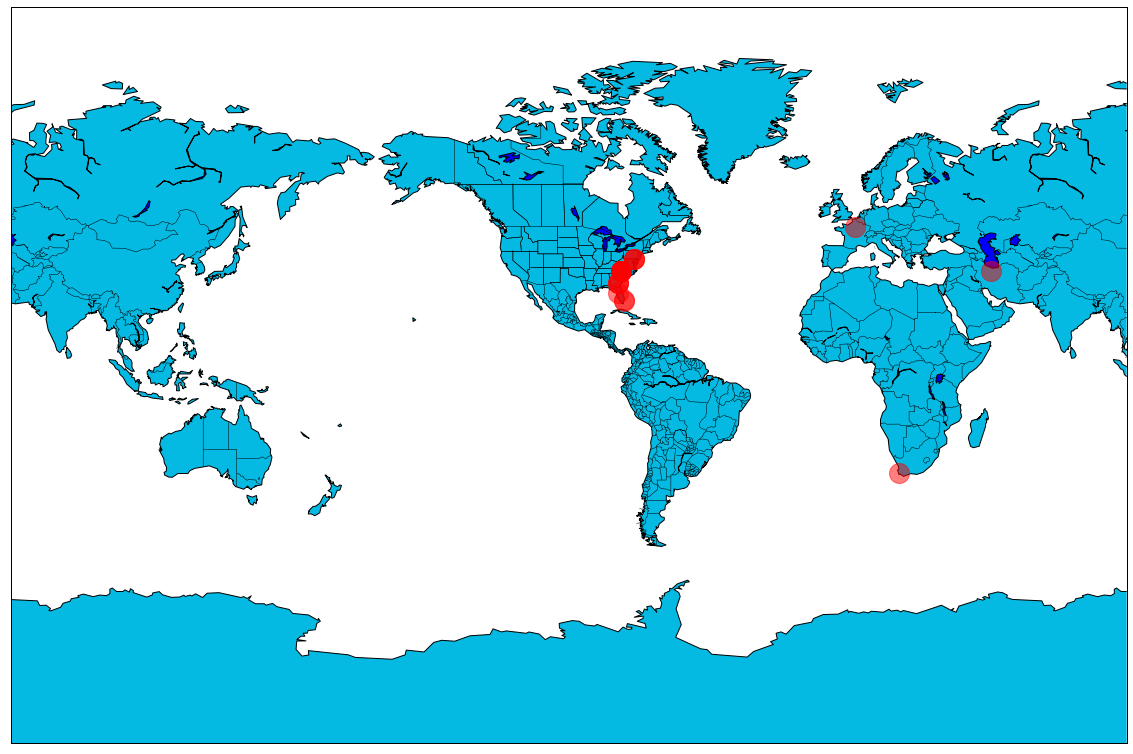

In [85]:
plt.figure(figsize=(20,20))
m=Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-300,urcrnrlon=100,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#04BAE3',lake_color='#0000FF')
m.drawmapboundary(fill_color='#FFFFFF')

for key in userLocation.keys():
    for l in userLocation[key]:
        x,y=m(l[1],l[0])
        m.plot(x,y,'ro',markersize=20,alpha=0.5)


In [38]:
with open("Locations.txt",'w') as f:
    for i in userLocation.keys():
        f.write(str(i))
        f.write(" : ")
        f.write(str(userLocation.get(i)))
        f.write("\n")